In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree


In [5]:
data = pd.read_csv('BreastCancer.csv')
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
#checking for missing values
data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [11]:
#selecting x, y
x = data.iloc[:, :9] 
y = data.iloc[:, 9]

In [8]:
#checking for data unbalance by checking if this data set is having more 0's than 1's or vice versa
y.value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)
knn1 = KNeighborsClassifier(n_neighbors=5)#using KNN classifier
knn1.fit(x_train, y_train) #fitting the model with training data set 
#predicting the model with testing data set

KNeighborsClassifier()

In [14]:
y_pred = knn1.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) #checking the accuracy of the model

0.375

In [16]:
clt=DecisionTreeClassifier()
clt.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.47058823529411764, 0.9375, 'Glucose <= 91.5\ngini = 0.488\nsamples = 92\nvalue = [39, 53]\nclass = 2'),
 Text(0.23529411764705882, 0.8125, 'Resistin <= 13.248\ngini = 0.444\nsamples = 39\nvalue = [26, 13]\nclass = 1'),
 Text(0.3529411764705882, 0.875, 'True  '),
 Text(0.11764705882352941, 0.6875, 'Resistin <= 3.281\ngini = 0.159\nsamples = 23\nvalue = [21, 2]\nclass = 1'),
 Text(0.058823529411764705, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 2'),
 Text(0.17647058823529413, 0.5625, 'Adiponectin <= 3.986\ngini = 0.087\nsamples = 22\nvalue = [21, 1]\nclass = 1'),
 Text(0.11764705882352941, 0.4375, 'Leptin <= 14.39\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 1'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 2'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 1'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = 1'),
 Text(0.35294117647058826, 0.

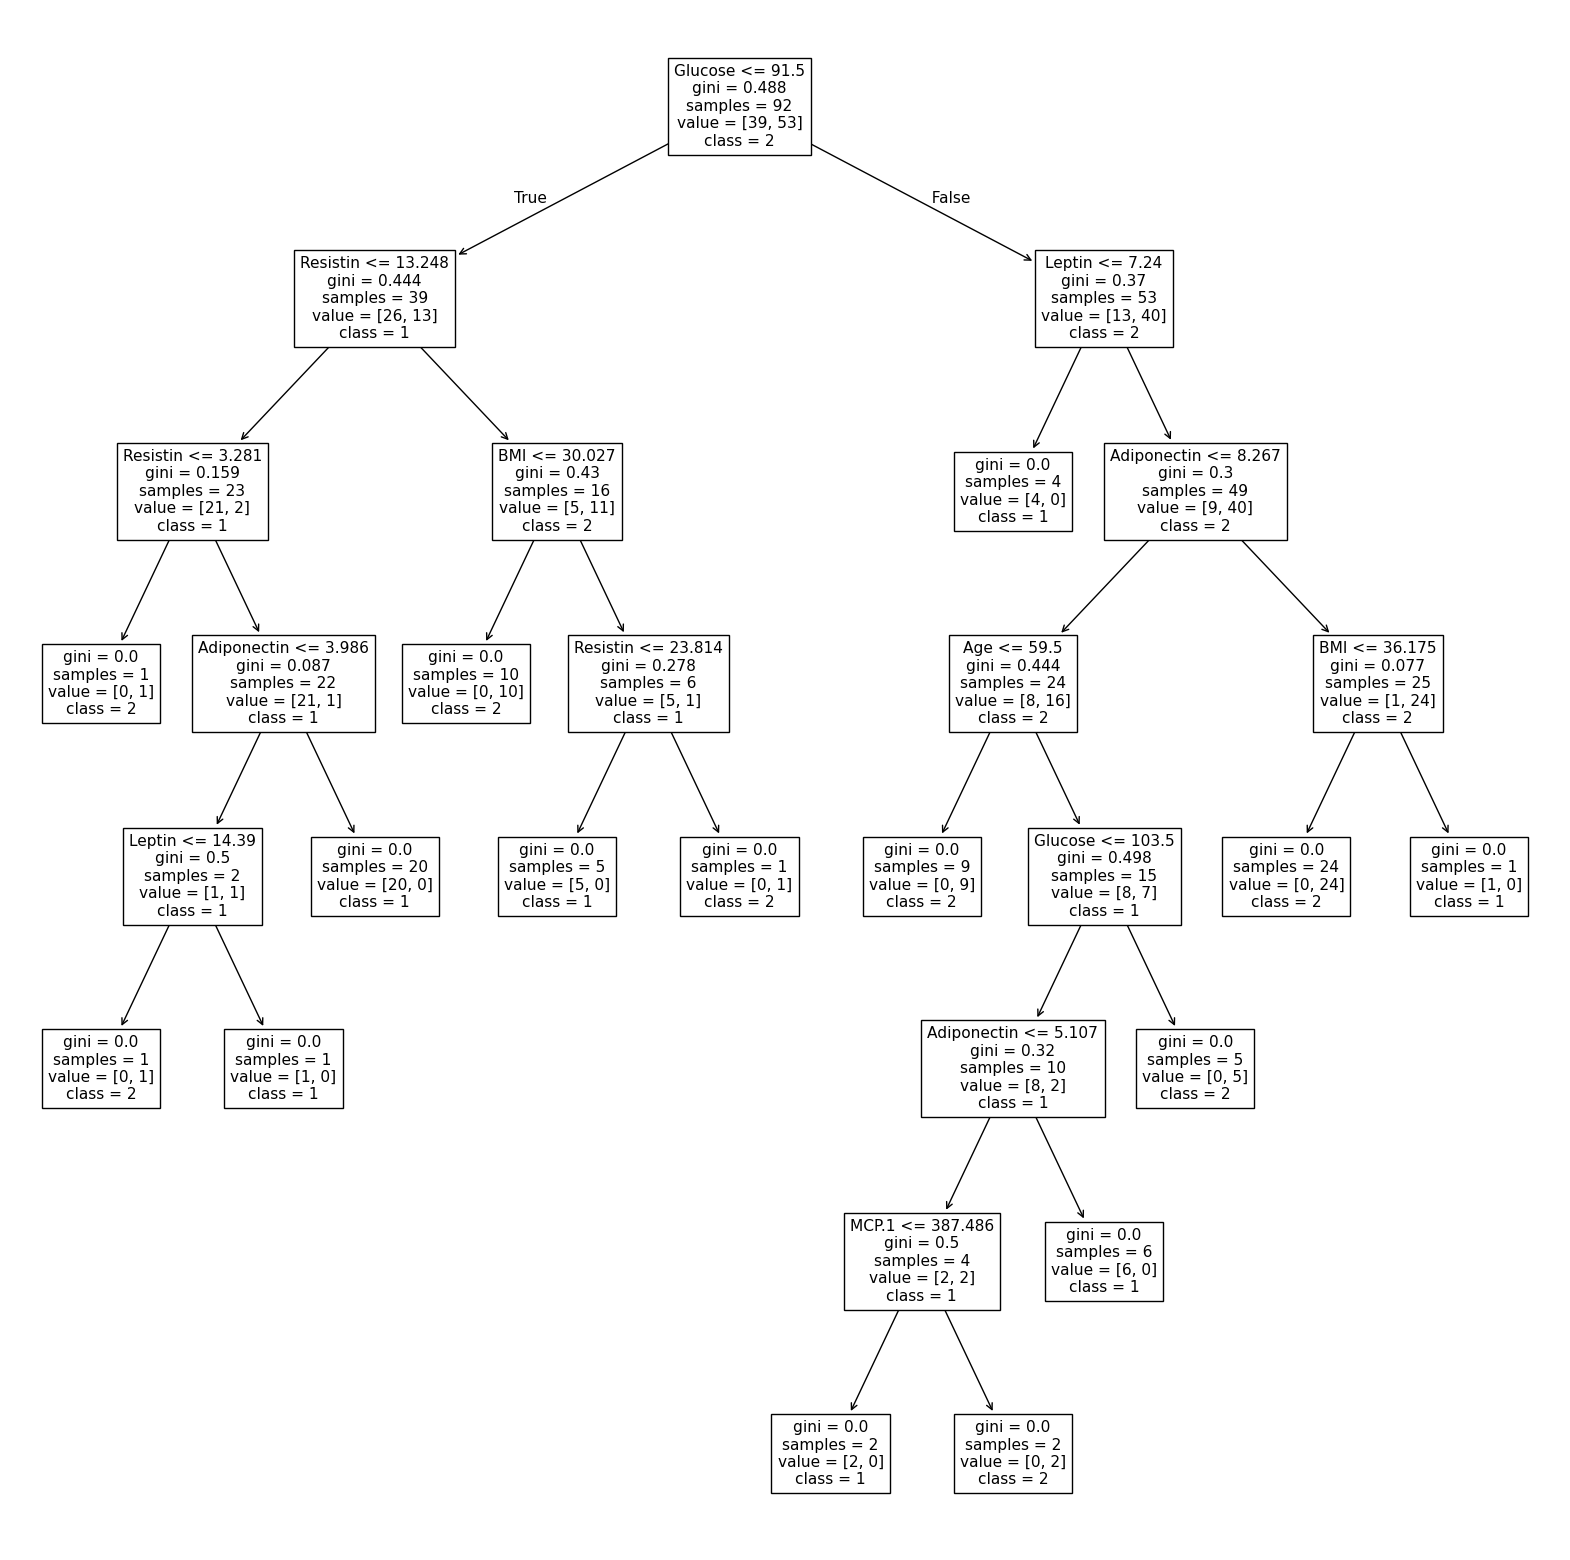

In [18]:
plt.figure(figsize=(20,20))
plot_tree(clt, feature_names=(data.columns),class_names=['1','2'])

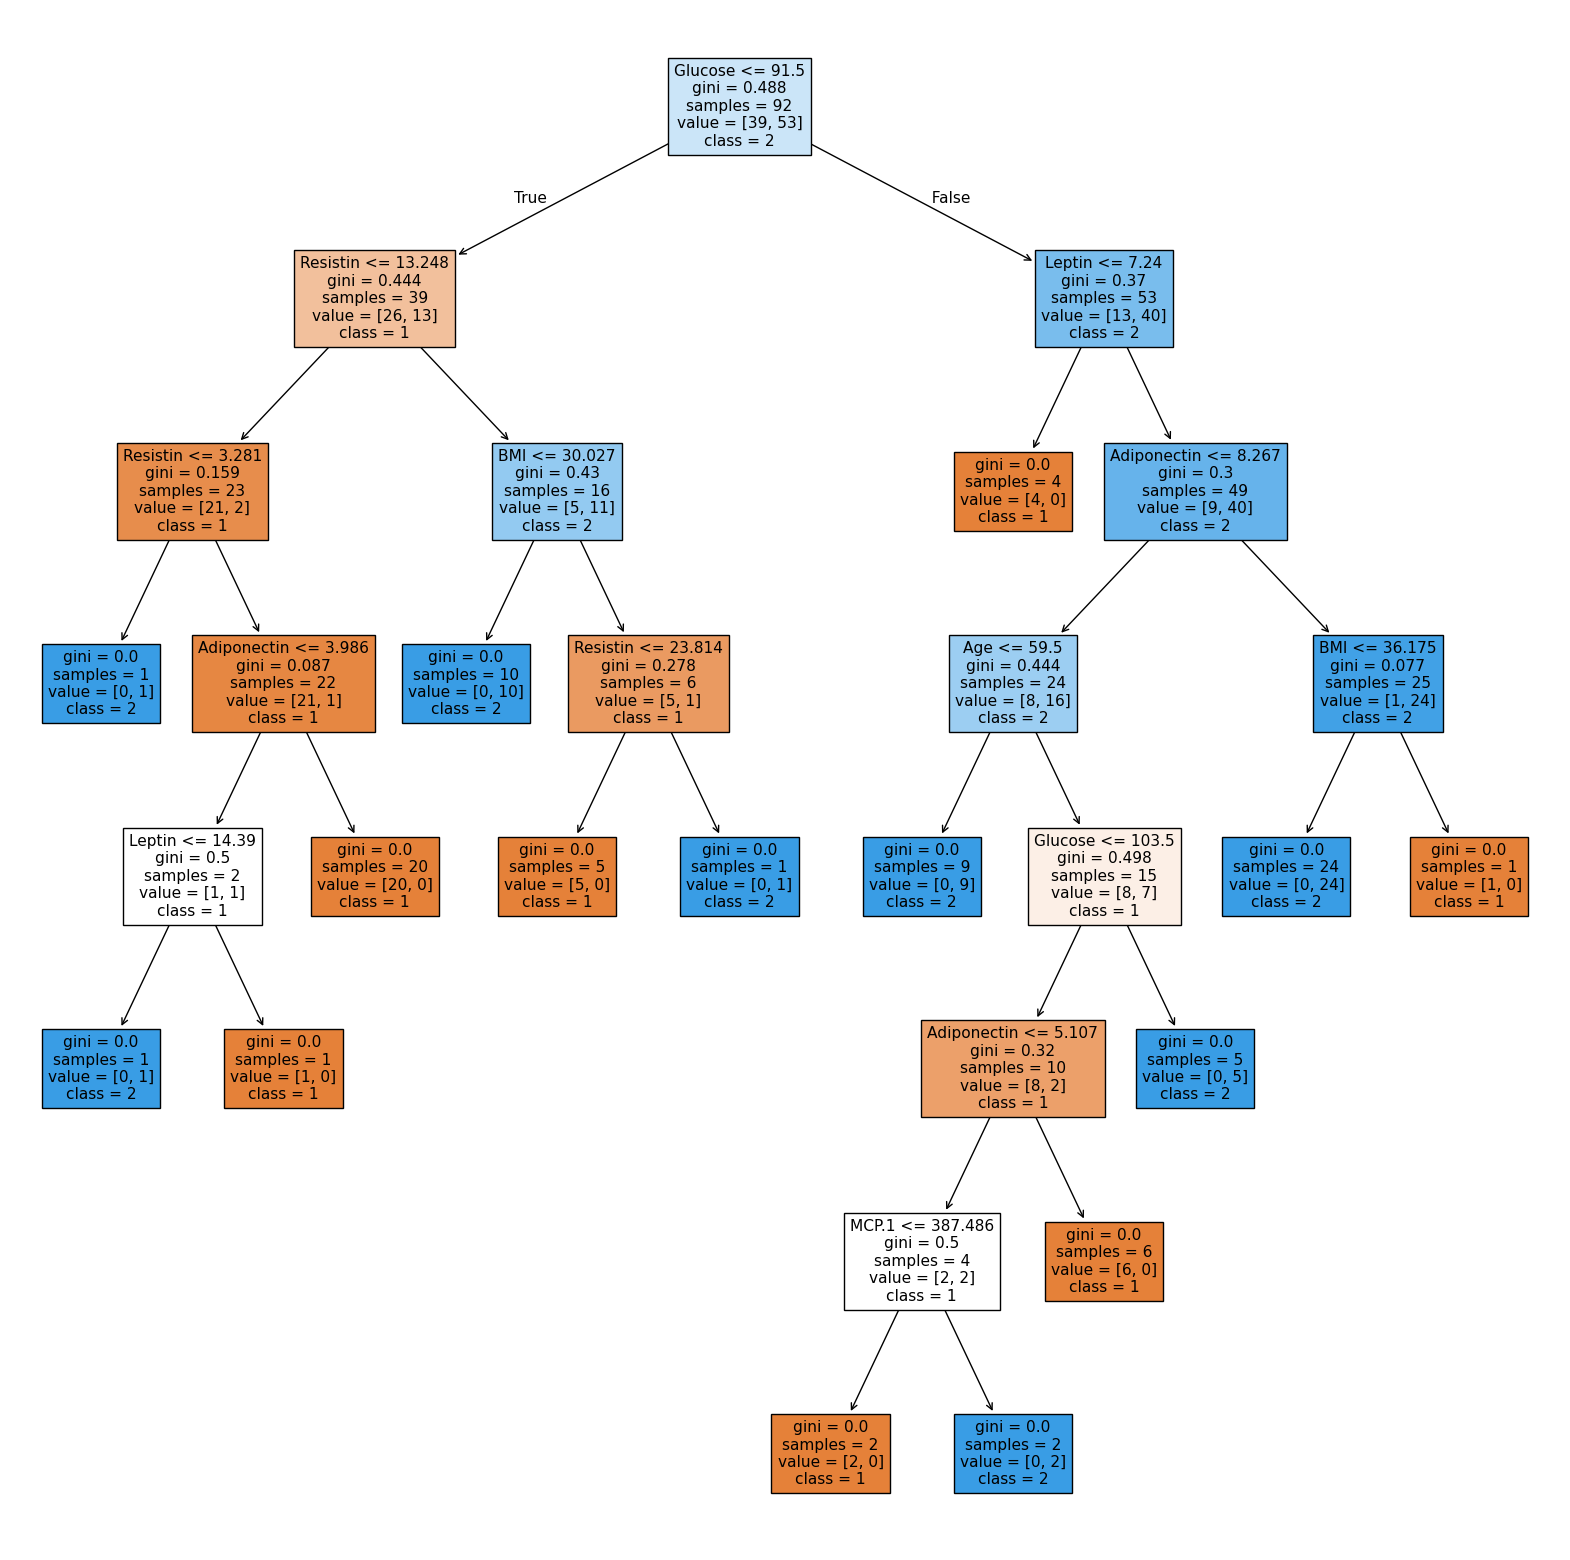

In [19]:
plt.figure(figsize=(20,20))
plot_tree(clt, feature_names=(data.columns),class_names=['1','2'],filled=True)
plt.show()

In [ ]:
?DecisionTreeClassifier
#checking the accuracy of the model

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None

# Pruning (Removing unnecessary branches)

In [24]:
cltp=DecisionTreeClassifier(criterion='entropy',max_depth=3)
cltp.fit(x_train,y_train)#fitting the model with training data set 


DecisionTreeClassifier(criterion='entropy', max_depth=3)

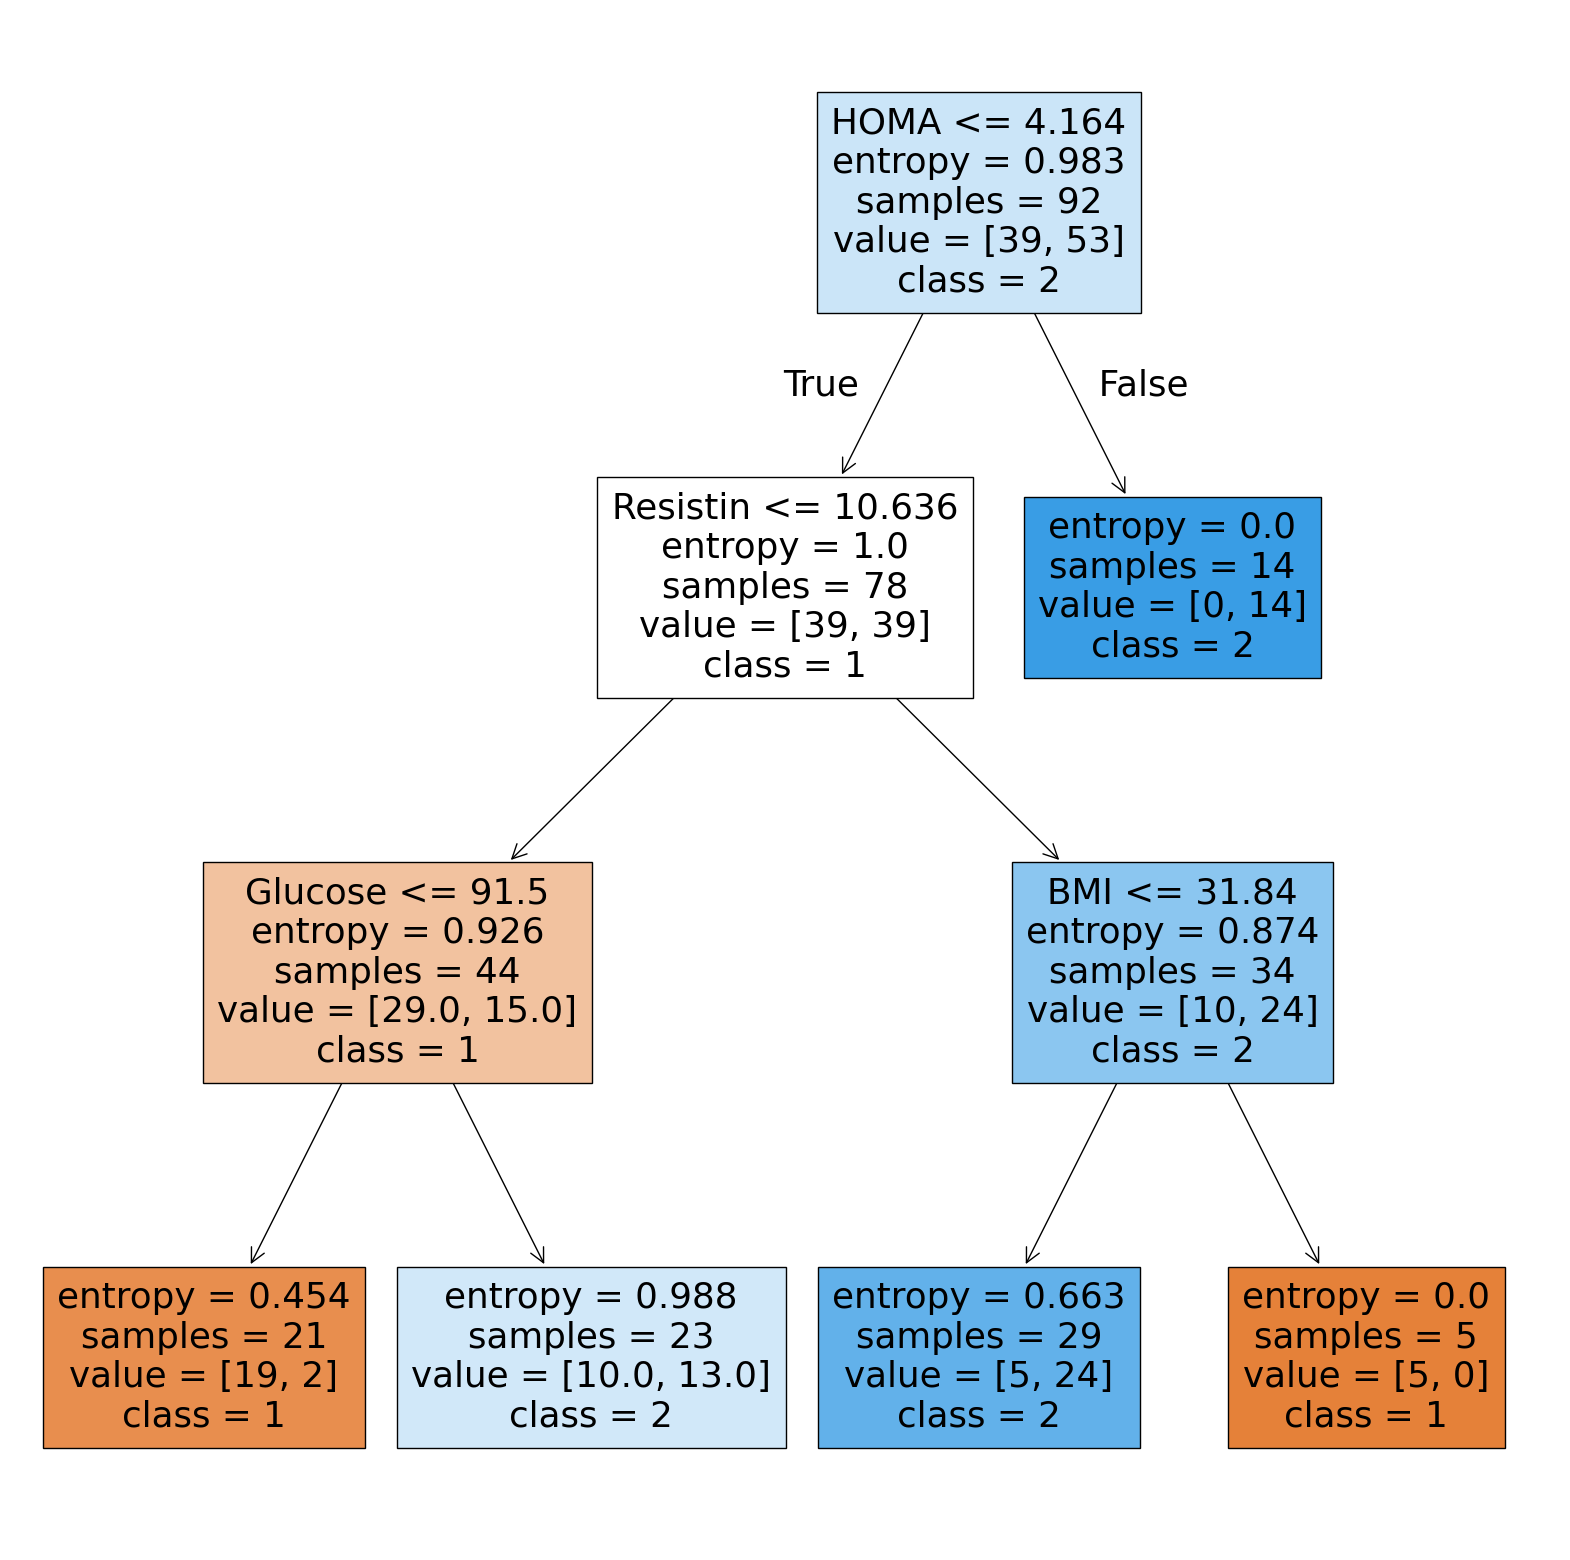

In [25]:
#we can give some values and pruned the tree
plt.figure(figsize=(20,20))
plot_tree(cltp, feature_names=(data.columns),class_names=['1','2'],filled=True)
plt.show()

In [27]:
arr = np.array([48, 23.5, 70, 2.707, 0.467409, 8.8071, 9.702400, 7.99585, 417.114]).reshape(1, 9)
cltp.predict(arr)



array([1], dtype=int64)

In [31]:
dataframe = pd.DataFrame(pd.read_csv('Boston for LR.csv'))
dataframe.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [39]:
x=dataframe.iloc[:, :12]
y=dataframe.iloc[:,12]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)

In [40]:
rgt=DecisionTreeRegressor(max_depth=3)
rgt.fit(x_train,y_train)    

DecisionTreeRegressor(max_depth=3)

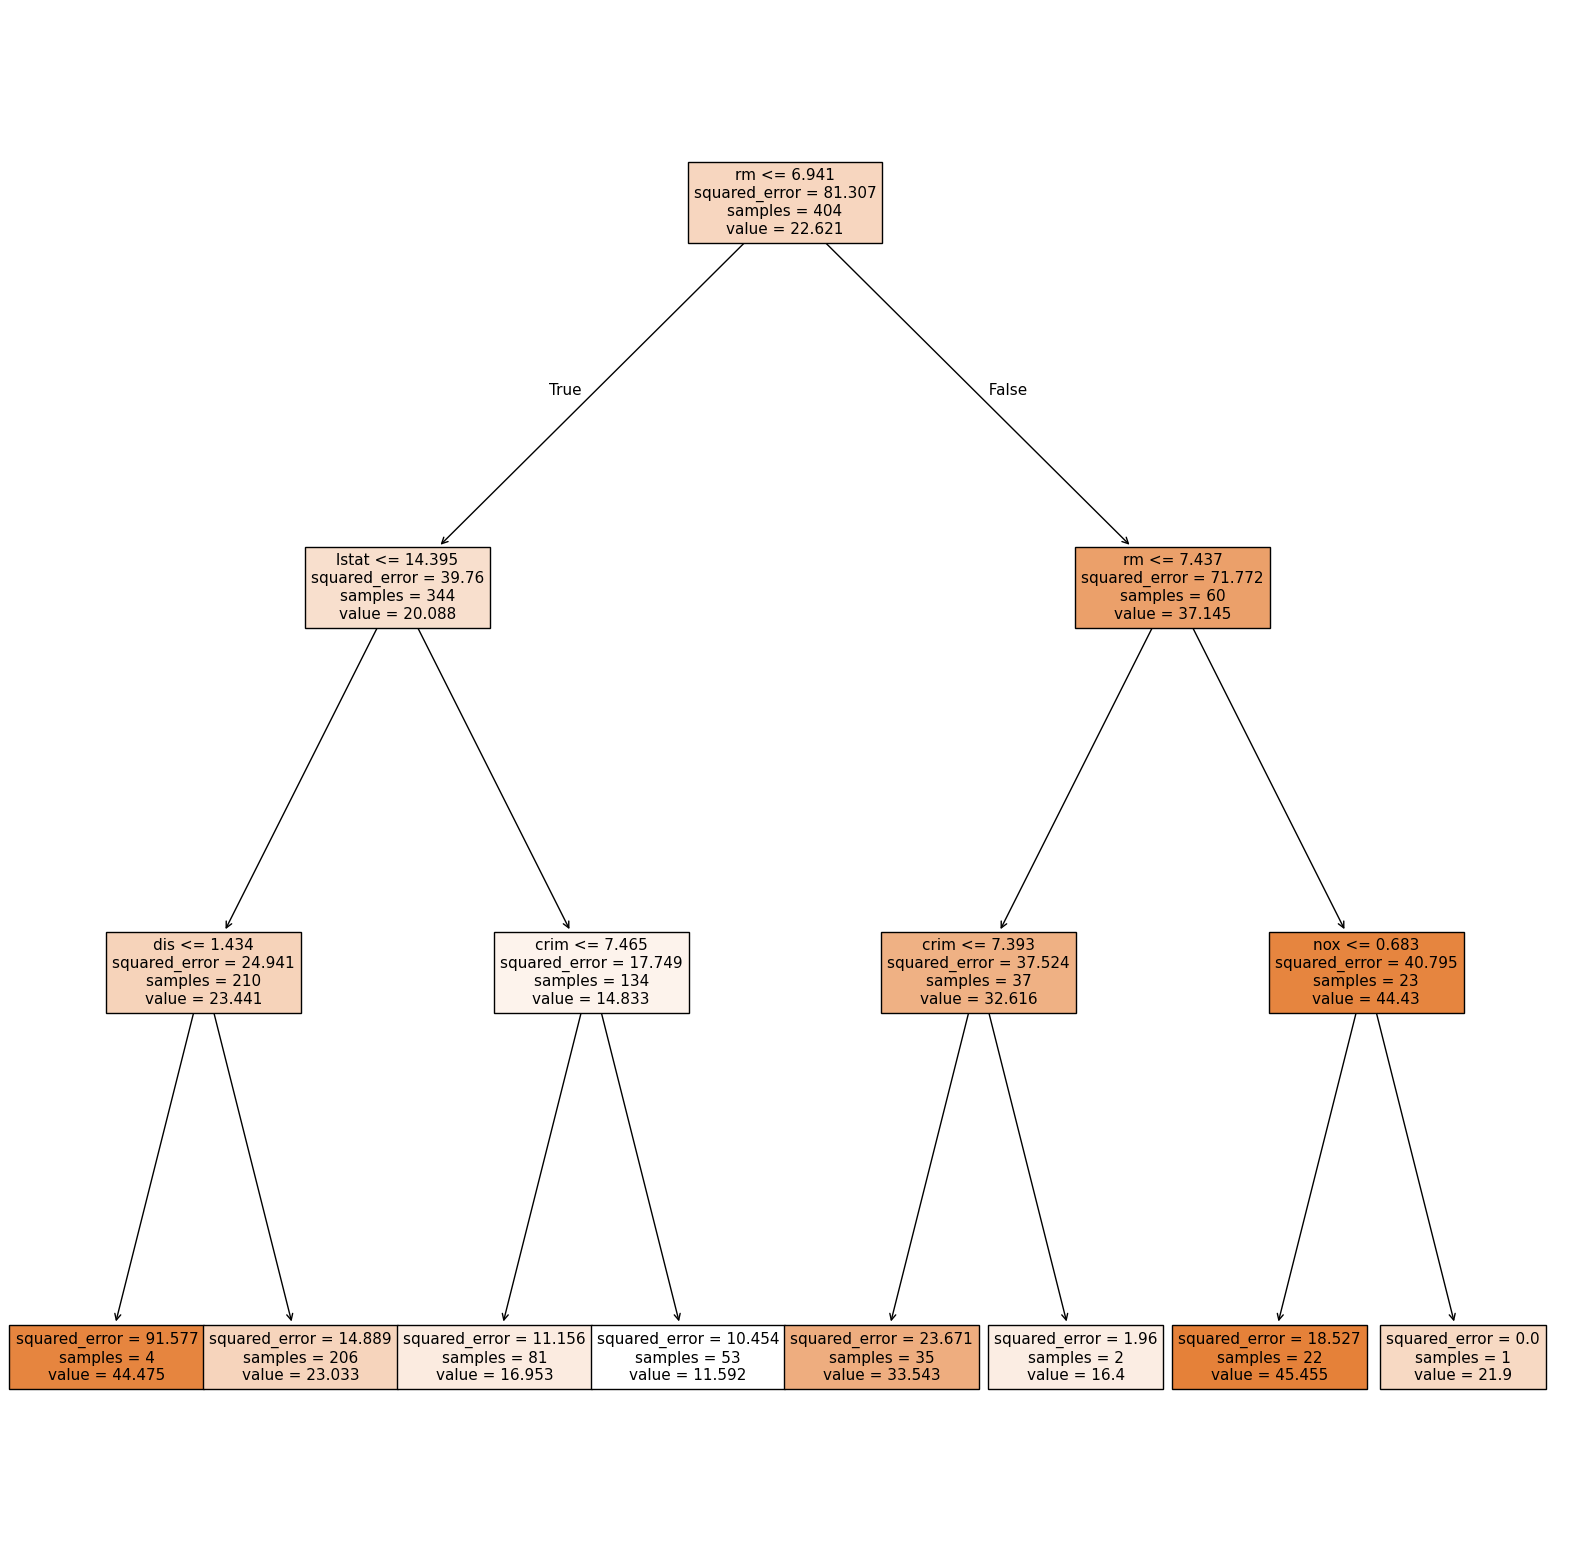

In [46]:
plt.figure(figsize=(20,20))
plot_tree(rgt, feature_names=(dataframe.columns),filled=True)
plt.show()

In [48]:
y_pred=rgt.predict(x_test)
rgt.score(x_test,y_test)

0.7448362704845621

In [49]:
arr = np.array([0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90]).reshape(1, 12)
rgt.predict(arr)

array([16.95308642])